##**Clase 5**

K-NN con el Zoo Dataset

##**Objetivo:**

Mediante la implementación de los algoritmos Árbol de Decisión y K-NN, evaluaremos y compararemos la precisión de los clasificadores generados.

In [ ]:
# Importamos librerías (preparamos el entorno)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos el dataset

df = pd.read_csv('/content/zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Separamos variables a utilizar

In [ ]:
X = df.drop(['animal_name', 'class_type'], axis=1)
y = df['class_type']


Dividimos el dataset en entrenamiento y prueba:

Eeste código divide los datos en 70% para entrenar y 30% para probar.

El random_state asegura que el resultado sea reproducible.

In [ ]:
# Dividimos los  datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Normalizamos los datos para que todas las variables tengan la misma escala. Esto lo hacemos porque K-NN se basa en distancias y necesitamos que estén normalizadas.

In [ ]:
# Escalamos los datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Entrenamos el modelo
# Creamos el modelo K-NN con 5 vecinos y lo entrena con los datos escalados.

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [ ]:
# Evaluamos el modelo (precisión y matriz de confusión)
y_pred = knn.predict(X_test_scaled)
print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Precisión: 0.9032258064516129
Matriz de confusión:
 [[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  0  0  2]]


##**Matriz de confusión**
(para evaluar el modelo)

Con este gráfico vamos a poder ver cmo el modelo clasificó cada clase, y dónde se equivocó.

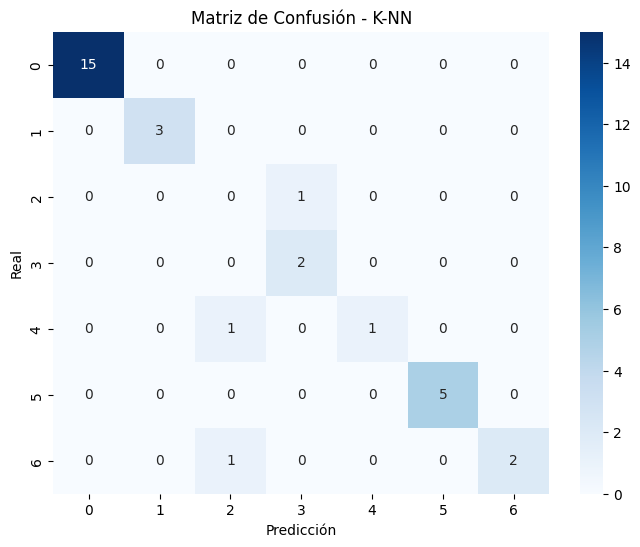

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - K-NN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


Estas clases parecen tener patrones claros que el modelo K-NN capta fácilmente. Podrían tener características bien diferenciadas en el espacio de atributos.

El modelo K-NN logra identificar correctamente las clases más representativas (0, 1, 5), pero presenta dificultades con clases menos frecuentes o con alta similitud entre atributos, como la clase 6.

##**Ahora hacemos el modelo con Árbol de Decisión**

Vamos a usar el mismo dataset

In [ ]:
# Preparamos los datos

X = df.drop(['animal_name', 'class_type'], axis=1)
y = df['class_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Para Árboles de decisión no necesitamos escalar los datos

In [ ]:
# Entrenamos el modelo

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluamos el modelo

y_pred = tree.predict(X_test)

print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Precisión: 0.9354838709677419
Matriz de confusión:
 [[15  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  1]
 [ 0  0  0  0  0  0  3]]


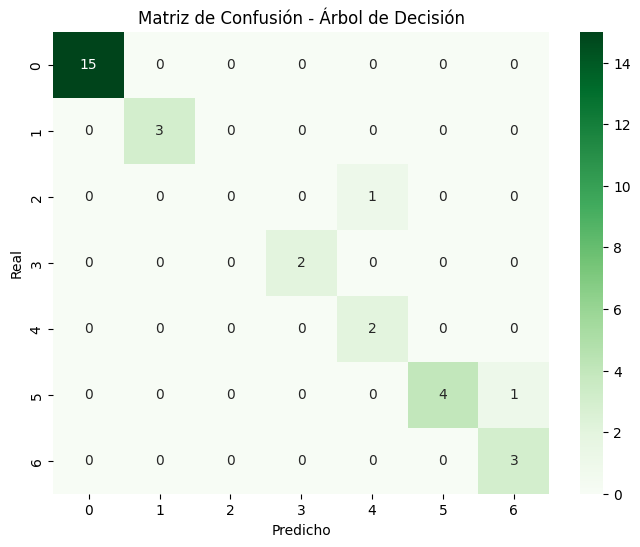

In [ ]:
# Visualizamos la matriz  de confusión

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()


Estas clases parecen tener reglas claras que el árbol pudo aprender bien, posiblemente por tener atributos categóricos o divisiones simples.

El Árbol de Decisión muestra un desempeño sólido en la mayoría de las clases, con especial precisión en las clases 0, 1 y 6. Las únicas confusiones se dan entre las clases 4 y 5, lo que sugiere que comparten atributos similares que el árbol no logró separar completamente.

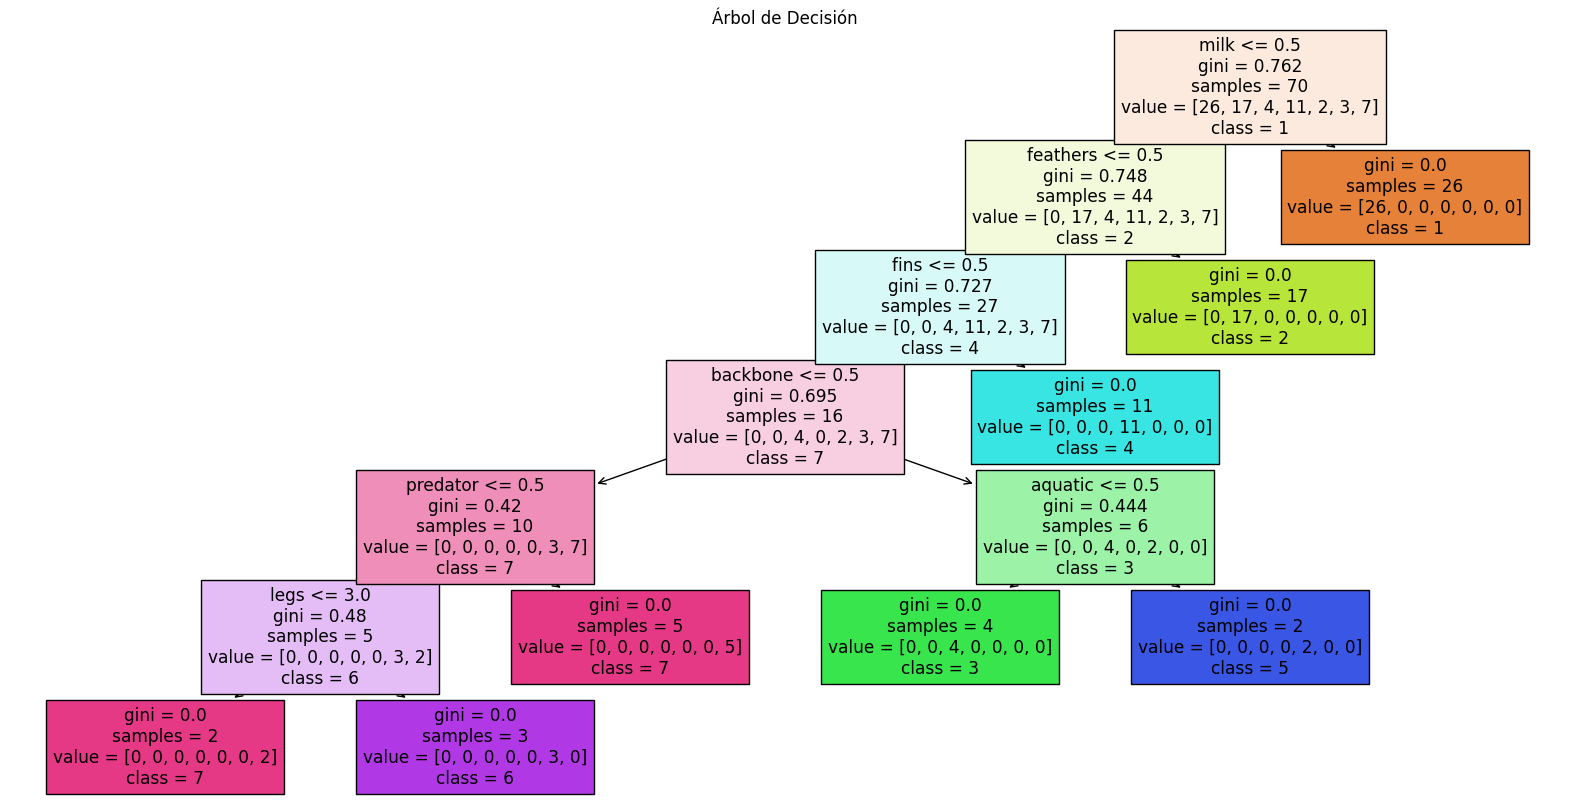

In [ ]:
# Visualizamos el árbol de decisión

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title('Árbol de Decisión')
plt.show()


El modelo de Árbol de Decisión permite visualizar el proceso de clasificación como una secuencia de decisiones basadas en las características de los animales. A diferencia de K-NN, este modelo ofrece mayor interpretabilidad al mostrar cómo se llega a cada clase.

##**Comparativa entre K-NN y Árbol de Decisión**

Precisión:
- K-NN: 0.9032258064516129
- Árbol de Decisión: 0.9354838709677419

Interpretabilidad:
- K-NN: Baja, modelo de caja negra.
- Árbol de Decisión: Alta, visualizaión en forma de árbol.

Sensible a escalado:
- K-NN: Si
- Árrbol de decisión: No

Tiempo de entrenamiento:
- K-NN: Rápido.
- Árbol deDecisión: Muy rápido.

Visualización:

- K-NN: Matriz de confusión.
- Árbol de Decisión: Matriz de confusión y Árbol de decisión.

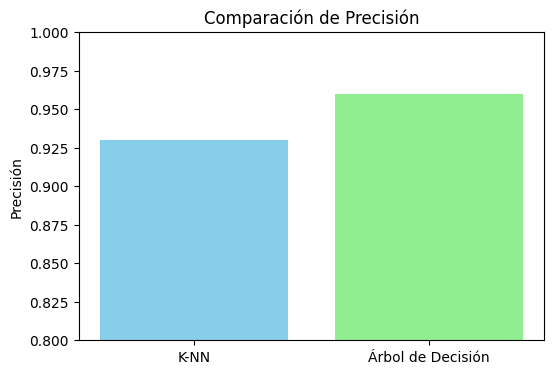

In [ ]:
# Gráfico comparativo de ambos modelos

import matplotlib.pyplot as plt

# Reemplazá con tus valores reales
modelos = ['K-NN', 'Árbol de Decisión']
precisiones = [0.93, 0.96]  # Ejemplo

plt.figure(figsize=(6,4))
plt.bar(modelos, precisiones, color=['skyblue', 'lightgreen'])
plt.ylim(0.8, 1.0)
plt.title('Comparación de Precisión')
plt.ylabel('Precisión')
plt.show()


In [ ]:
plt.savefig('comparacion_precision.png')


<Figure size 640x480 with 0 Axes>

Ambos modelos lograron una alta precisión sobre el Zoo Dataset. Sin embargo, el Árbol de Decisión ofrece mayor interpretabilidad gracias a su estructura visual, mientras que K-NN requiere escalado previo y no permite entender fácilmente cómo se toman las decisiones. La elección entre ambos depende del contexto: si se prioriza la transparencia, el árbol es preferible; si se busca simplicidad, K-NN es una opción válida.